In [1]:
import pandas as pd

df = pd.read_excel('data/default of credit card clients.xls', skiprows=1, index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df2 = df.sample(1000)

In [3]:
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report.to_file('defaults.html')

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [5]:
df.shape

(30000, 24)

In [6]:
import phik

phik_corr = df.phik_matrix()

interval columns not set, guessing: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


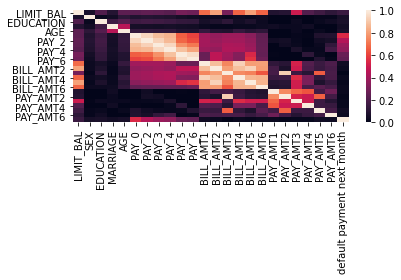

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(phik_corr)
plt.tight_layout()
plt.savefig('B17030_19_01.png', dpi=300)

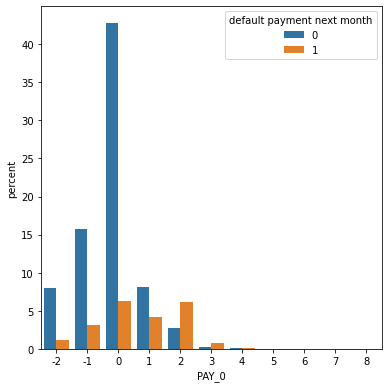

In [9]:
f = plt.figure(figsize=(5.5, 5.5))
sns.barplot(data=df, x='PAY_0', y='PAY_0', hue='default payment next month', estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('percent')
plt.tight_layout()
plt.savefig('B17030_19_02.png', dpi=300)

In [10]:
import pycaret.classification as pyclf

setup = pyclf.setup(data=df, target='default payment next month')

,Description,Value
0,session_id,4206
1,Target,default payment next month
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(30000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = pyclf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8211,0.7696,0.3690,0.6722,0.4761,0.3791,0.4041,0.2350
gbc,Gradient Boosting Classifier,0.8208,0.7830,0.3556,0.6792,0.4664,0.3712,0.3995,2.5430
ridge,Ridge Classifier,0.8204,0.0000,0.3478,0.6817,0.4603,0.3660,0.3960,0.0560
lightgbm,Light Gradient Boosting Machine,0.8197,0.7832,0.3696,0.6642,0.4745,0.3762,0.4000,0.3120
ada,Ada Boost Classifier,0.8178,0.7737,0.3303,0.6781,0.4440,0.3502,0.3828,0.5950
rf,Random Forest Classifier,0.8157,0.7616,0.3653,0.6450,0.4662,0.3650,0.3867,1.1340
et,Extra Trees Classifier,0.8065,0.7371,0.3683,0.5997,0.4562,0.3466,0.3619,1.1650
lr,Logistic Regression,0.7795,0.6423,0.0000,0.0000,0.0000,-0.0002,-0.0023,0.9020
knn,K Neighbors Classifier,0.7522,0.6077,0.1808,0.3723,0.2431,0.1158,0.1267,0.4680
dt,Decision Tree Classifier,0.7280,0.6131,0.4077,0.3887,0.3978,0.2223,0.2225,0.1680


In [12]:
tuned_model = pyclf.tune_model(best_model, search_library='scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7795,0.6424,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7795,0.6389,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7795,0.6595,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7795,0.6451,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7795,0.6557,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7795,0.6347,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7795,0.6356,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7795,0.6285,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7795,0.6602,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7799,0.6390,0.0000,0.0000,0.0000,0.0000,0.0000


In [13]:
predictions = pyclf.predict_model(tuned_model, df, raw_score=True)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(df['default payment next month'], predictions['Label'])

0.7788

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

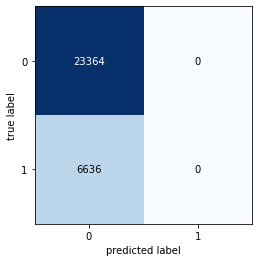

In [15]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(confusion_matrix(df['default payment next month'], predictions['Label']))

In [16]:
pyclf.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
df[df['PAY_5'] == 6]['default payment next month'].value_counts(normalize=True)

1    0.75
0    0.25
Name: default payment next month, dtype: float64

In [18]:
df[df['PAY_5'] == 6]['default payment next month'].value_counts()

1    3
0    1
Name: default payment next month, dtype: int64